In [1]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision

In [2]:
import os
from PIL import Image
from tqdm import tqdm
import numpy as np

In [35]:
checkpoint_path = "D:/project/asl/checkpoint_data.pt"
def load_model(model):
    saved_state_dict = torch.load(checkpoint_path)
    model.load_state_dict(saved_state_dict)
    return model

In [34]:
from torchvision.models import resnet50
class Resnet50_Fine(torch.nn.Module):
    def __init__(self,num_classes):
        super(Resnet50_Fine, self).__init__()

        self.pretrained = resnet50(pretrained=True)

        num_ftrs = self.pretrained.fc.in_features
        self.pretrained.fc = nn.Linear(num_ftrs, num_classes)
    def forward(self, x):
        x = self.pretrained(x)
        return x

model = Resnet50_Fine(num_classes=26)
#

c:\Users\Yuriy\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Yuriy\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [36]:
model = load_model(model)

In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [38]:

model.to(device)
opt_myCNN = optim.Adam(model.parameters(), lr = 0.0001)
criterion = nn.CrossEntropyLoss()
num_epochs=1

In [32]:
def validate_(model, optimizer, dataloader):
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    val_running_errors = 0
    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader), total=int(len(dataloader.dataset)/dataloader.batch_size)):
            #print(data[0].shape)
            data, labels = data[0].to(device), data[1].to(device)

            outputs = model(data)
            #
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item()* data.size(0)
            _, preds = torch.max(outputs.data, 1)
            print(labels)
            print(preds)
            val_running_correct += torch.sum(preds == labels)
            val_running_errors += torch.sum(preds != labels)

        val_loss = val_running_loss/len(dataloader.dataset)
        val_accuracy = val_running_correct/len(dataloader.dataset)
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy}')
    model.train()
    return outputs, labels, preds

In [31]:
testData_Dir = "D:\\project\\dataset\\sing\\asl_alphabet_train\\asl_alphabet_train"

# Define the transformations
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a fixed size
    transforms.ToTensor(),  # Convert images to tensors
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize the images
])

test = datasets.ImageFolder(testData_Dir, transform=train_transform)
train_size = int(0.9 * len(test))
test_size = len(test) - train_size
t , v = random_split(test, [train_size, test_size])

test_loader = DataLoader(v, batch_size=5, shuffle=False)

In [39]:
validate_(model, _ , test_loader)

  0%|          | 0/870 [00:00<?, ?it/s]


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


1


1it [00:00,  3.14it/s]

Val Loss: 20.5002, Val Acc: 0.1785714328289032


In [307]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [326]:
count = [0]*29
for e in val_loader.dataset:
    count[e[1]] +=1

In [ ]:
model

In [36]:
outputs, leble, pred  = validate_(model, _ , test_dataloader)

1


0it [00:00, ?it/s]


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [314]:
def plot_confusion_matrix(cm, 
                      normalized=False, 
                      title=None, 
                      cmap=plt.cm.Blues,
                      size=(16,12)):
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

In [311]:
cm = confusion_matrix(pred.to("cpu"), leble.to("cpu"))

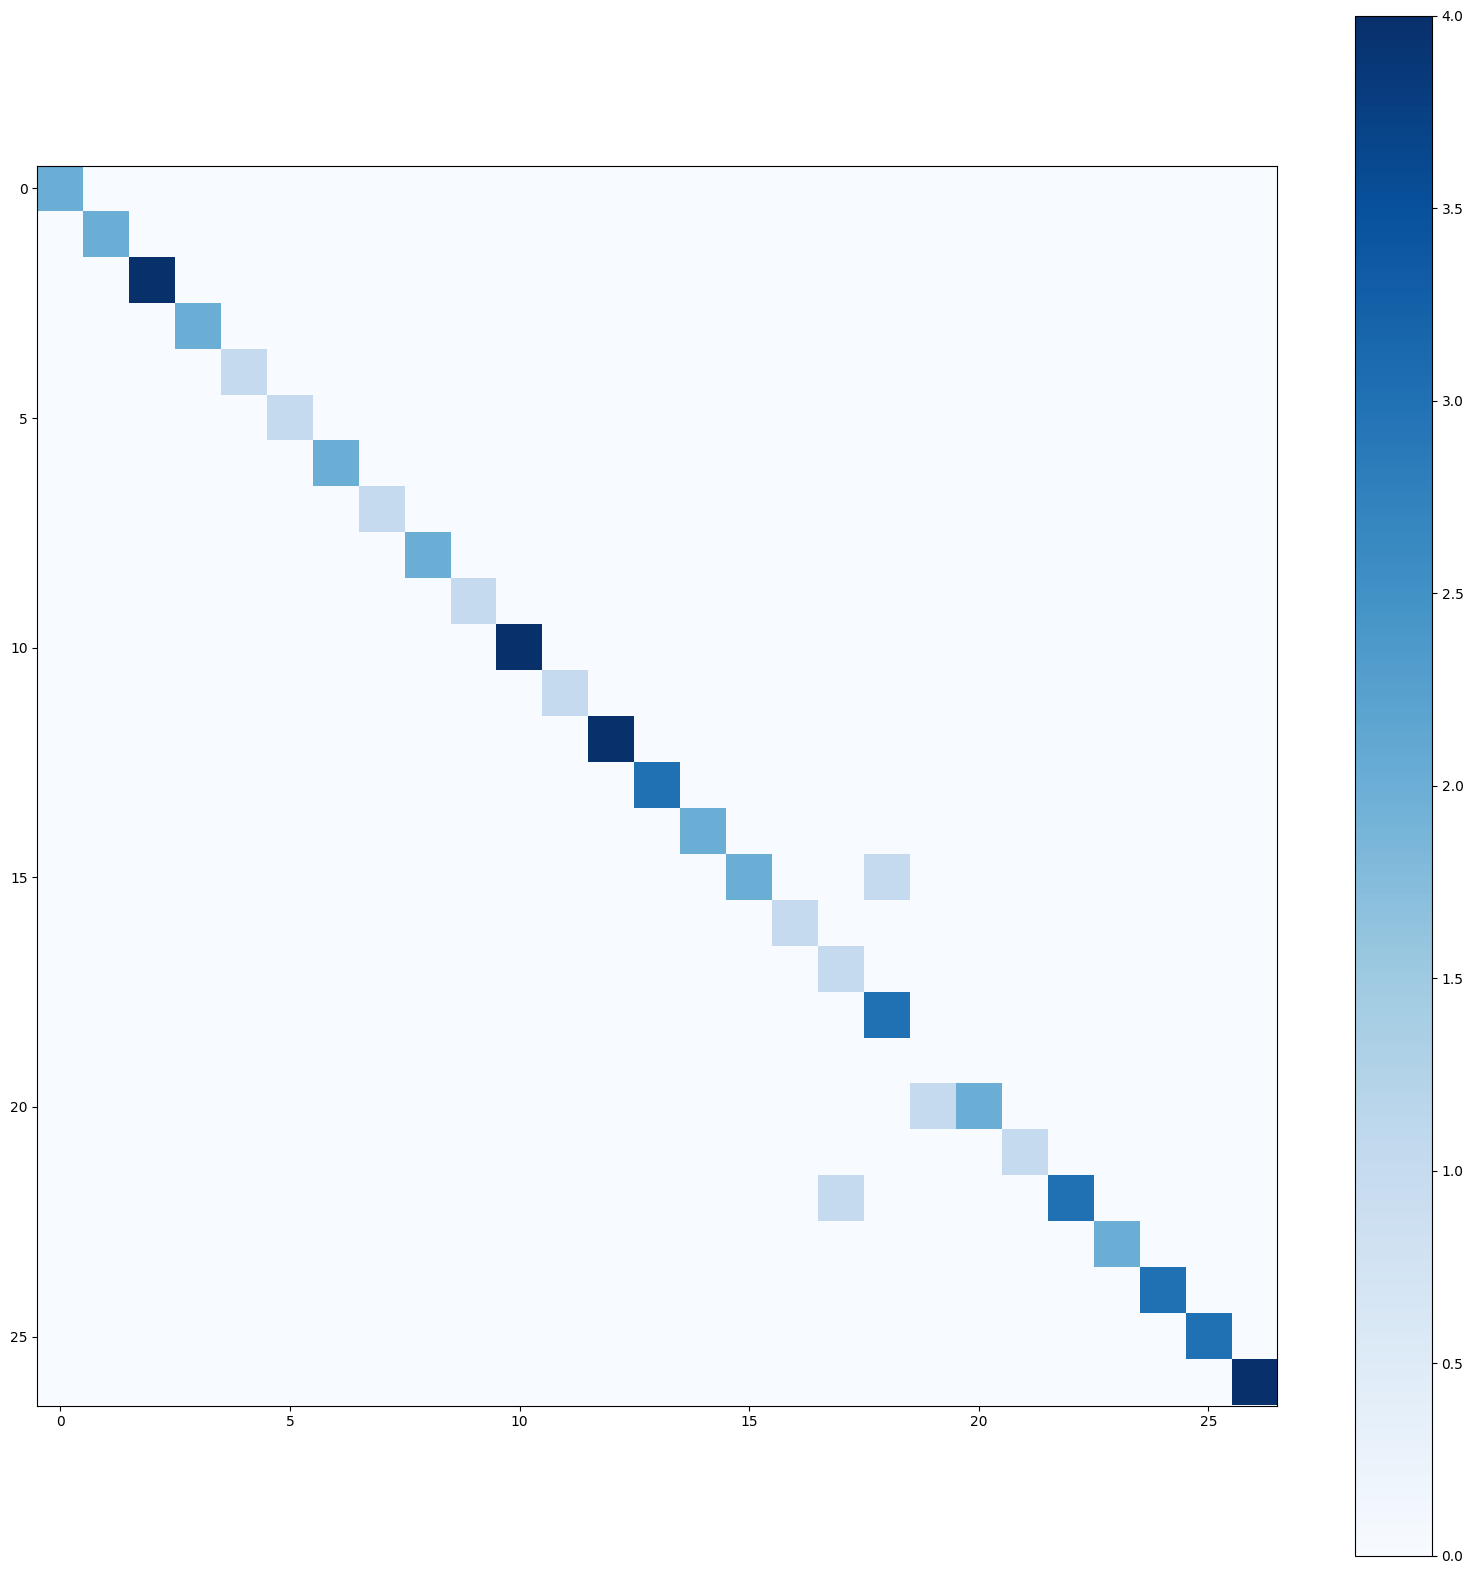

In [316]:
plot_confusion_matrix(cm,
                      normalized=True, 
                      title="Model Performance", 
                      cmap=plt.cm.Blues,
                      size=(20, 20))

In [58]:
model.features.state_dict()

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [312]:
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 

In [231]:
model_test = SimpleCNN(29)

In [142]:
saved_state_dict = torch.load(checkpoint_path)

model_test.load_state_dict(saved_state_dict)
model_test.to(device)

SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=29, bias=True)
  )
)

In [185]:
len(train_data_loader.dataset)

87000

In [342]:
out, lab, preds =  validate_(model, "8" ,test_dataloader)

1


1it [00:00,  6.56it/s]

Val Loss: 3.3891, Val Acc: 0.0357142873108387


In [343]:
preds

tensor([28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
        28, 28, 28, 28, 28, 28, 28, 28, 28, 28], device='cuda:0')

In [344]:
lab

tensor([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 14, 16, 17, 18,
        19, 21, 20, 22, 23, 24, 25, 26, 27, 28], device='cuda:0')

In [168]:
test_dataset[:,0]

IndexError: too many indices for tensor of dimension 1

In [176]:
out_R  =model_test(images_t.to(device))
loss = criterion(out_R, lables_t.to(device))

In [180]:
out_R

tensor([[  25.1246,  -17.7779,  -30.0222,  -46.3044,  -13.8914,  -13.6885,
          -33.4458,  -59.6534,  -17.4975,  -46.3703,  -45.5736,   -0.7717,
          -10.1311,  -16.1549,   -4.7489,  -39.6303,  -25.6147,  -51.9624,
            8.8614,   27.1093,  -26.5826,  -34.8662,  -16.8425,   10.4190,
            0.4968,   -6.2862,  -45.1497,   -7.3668,  -32.7714],
        [  -3.4972,   31.2964,  -28.4469,   -3.5423,   19.0190,  -17.2941,
          -26.2976,  -15.2658,    5.8858,  -37.4065,  -36.9119,  -33.4379,
          -15.3079,  -18.1010,  -20.4883,  -24.0730,  -25.1254,  -32.8994,
           -3.7259,  -26.4858,  -11.4578,  -49.4884,  -27.8632,  -28.3417,
          -25.3667,  -53.3120,  -26.9595,   -9.6482,  -48.6743],
        [ -37.7241,  -78.8876,   92.2101,   29.9073,    7.8852,  -19.0678,
          -12.7656,  -54.3811,  -25.9852,  -99.3926, -131.8276,  -40.5023,
          -76.2138,  -68.5968,   17.5785,  -41.7020,    5.9910, -155.1064,
           -2.1584,  -23.8685, -105.0168, -13

In [186]:
_, preds = torch.max(out_R.data, 1)

In [187]:
_

tensor([ 27.1093,  31.2964,  92.2101,  57.4406,  38.3035, 124.1692,  50.7408,
         67.6636,  45.2949,  37.1401,  25.1132,  33.7056,  26.8946,  21.5302,
         46.9998,  51.6844,  68.3438,  59.0578,   5.4448,  16.1544,  19.0294,
         35.4986,  25.2949,  20.5789,  47.1341,  14.0050,  31.2637,  24.2863],
       device='cuda:0')

In [188]:
preds

tensor([19,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 27, 13, 14, 15, 16,
        17, 28, 18, 19, 20, 21, 22, 23, 24, 25], device='cuda:0')

In [189]:
lables_t

tensor([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 14, 16, 17, 18,
        19, 21, 20, 22, 23, 24, 25, 26, 27, 28])

In [177]:
loss

tensor(45.9709, device='cuda:0', grad_fn=<NllLossBackward0>)